# Used Car Cost Prediction

In this project, the goal is to build a machine learning model to predict the prices of used cars based on various factors like the car manufacturer, model, kilometers driven, fuel type, body style, and more. The dataset contains over 1,000 entries and 19 features related to used cars, sourced from car dealerships.

### About the Dataset
The "Indian IT Cities Used Car Dataset 2023" is a comprehensive collection of data that offers valuable insights into the used car market across major metro cities in India. This dataset provides a wealth of information on a wide range of used car listings, encompassing details such as car models, variants, pricing, fuel types, dealer locations, warranty information, colors, kilometers driven, body styles, transmission types, ownership history, manufacture dates, model years, dealer names, CNG kit availability, and quality scores.

In [106]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [107]:
# Loading the data

df = pd.read_csv('usedcars.csv')
df.head()

,Id,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,555675,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,5.75 Lakhs,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8
1,556383,MARUTI SUZUKI,ALTO,LXI,PETROL,Red,10322,HATCHBACK,Manual,2021-03-01,2021,NaN,4.35 Lakhs,1st Owner,Karnataka,Renew 4 u Automobiles PVT Ltd,Bangalore,1,8.3
2,556422,HYUNDAI,GRAND I10,1.2 KAPPA ASTA,PETROL,Grey,37889,HATCHBACK,Manual,2015-03-01,2015,NaN,4.7 Lakhs,1st Owner,Karnataka,Anant Cars Auto Pvt Ltd,Bangalore,1,7.9
3,556771,TATA,NEXON,XT PLUS,PETROL,A Blue,13106,HATCHBACK,NaN,2020-08-01,2020,NaN,9.9 Lakhs,1st Owner,Karnataka,Adeep Motors,Bangalore,1,8.1
4,559619,FORD,FIGO,EXI DURATORQ 1.4,DIESEL,Silver,104614,HATCHBACK,Manual,2010-11-01,2010,NaN,2.7 Lakhs,2nd Owner,Karnataka,Zippy Automart,Bangalore,0,7.5


### Data Wrangling

In [108]:
df.shape

(1064, 19)

In [109]:
df.drop('Id',axis=1,inplace=True)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1064 non-null   object 
 1   Model             1064 non-null   object 
 2   Variant           1064 non-null   object 
 3   FuelType          1063 non-null   object 
 4   Colour            1064 non-null   object 
 5   Kilometer         1064 non-null   int64  
 6   BodyStyle         1064 non-null   object 
 7   TransmissionType  350 non-null    object 
 8   ManufactureDate   1064 non-null   object 
 9   ModelYear         1064 non-null   int64  
 10  CngKit            22 non-null     object 
 11  Price             1064 non-null   object 
 12  Owner             1064 non-null   object 
 13  DealerState       1064 non-null   object 
 14  DealerName        1064 non-null   object 
 15  City              1064 non-null   object 
 16  Warranty          1064 non-null   int64  


In [111]:
df.duplicated().sum()

0

In [112]:
# Changing the string to float in price column
def convert_amount(amount_str):
    if "Lakhs" in amount_str:
        return float(amount_str.replace(' Lakhs', '').replace(',', '')) * 100000
    else:
        return float(amount_str.replace(',', ''))

df['Price'] = df['Price'].apply(convert_amount)

In [113]:
df.head(1)

,Company,Model,Variant,FuelType,Colour,Kilometer,BodyStyle,TransmissionType,ManufactureDate,ModelYear,CngKit,Price,Owner,DealerState,DealerName,City,Warranty,QualityScore
0,MARUTI SUZUKI,CELERIO(2017-2019),1.0 ZXI AMT O,PETROL,Silver,33197,HATCHBACK,NaN,2018-02-01,2018,NaN,575000.0,1st Owner,Karnataka,Top Gear Cars,Bangalore,1,7.8


In [114]:
df.isnull().sum()

Company                0
Model                  0
Variant                0
FuelType               1
Colour                 0
Kilometer              0
BodyStyle              0
TransmissionType     714
ManufactureDate        0
ModelYear              0
CngKit              1042
Price                  0
Owner                  0
DealerState            0
DealerName             0
City                   0
Warranty               0
QualityScore           0
dtype: int64

There are so much missing values in cngkit and transmission type. So I am dropping both columns

In [115]:
df.drop('TransmissionType',axis=1,inplace=True)
df.drop('CngKit',axis=1,inplace=True)

# Dropping manufacturing date because already have model column
df.drop('ManufactureDate',axis=1,inplace=True)

In [116]:
df['FuelType'].dropna(inplace=True)

In [117]:
df.describe()

,Kilometer,ModelYear,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,2016.864662,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,2003.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,2015.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,2017.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,2019.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,2023.000000,8.500000e+06,1.000000,9.400000


In [118]:
df['Variant'].value_counts()

VXI                      37
LXI                      20
VXI AMT                  16
1.2 SMT I VTEC           13
VX MT PETROL             12
                         ..
TITANIUM 2.2 4X2 AT       1
LXI 1.0 (O) CNG BS-VI     1
200 PETROL SPORT          1
2.5 MT                    1
SV MT DIESEL              1
Name: Variant, Length: 575, dtype: int64

In [119]:
# dropping becausse too much value counts
df.drop('Variant', axis = 1, inplace=True)

In [120]:
# calculating age from model
df['ModelYear'] = 2023 - df['ModelYear']
df.rename(columns={'ModelYear':'Age'},inplace=True)

In [121]:
df.describe()

,Kilometer,Age,Price,Warranty,QualityScore
count,1064.000000,1064.000000,1.064000e+03,1064.000000,1064.000000
mean,52807.187970,6.135338,8.350536e+05,0.738722,7.770207
std,33840.296979,2.996786,5.726538e+05,0.439538,0.719717
min,101.000000,0.000000,9.500000e+04,0.000000,0.000000
25%,32113.500000,4.000000,4.850000e+05,0.000000,7.500000
50%,49432.000000,6.000000,6.750000e+05,1.000000,7.800000
75%,68828.500000,8.000000,9.850000e+05,1.000000,8.100000
max,640000.000000,20.000000,8.500000e+06,1.000000,9.400000


## EDA & Visualization

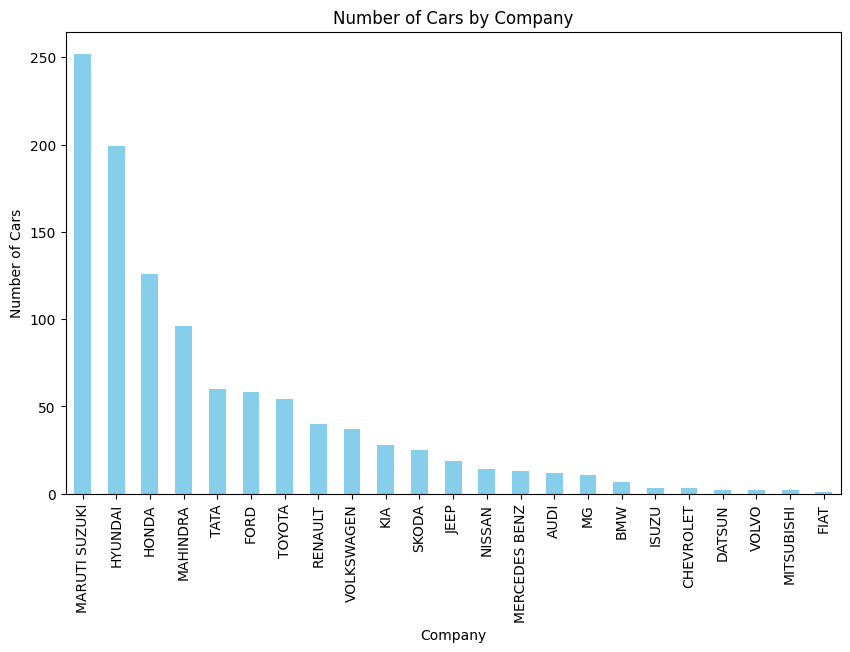

In [122]:
# Count the number of cars by company
cars_by_company = df['Company'].value_counts()
plt.figure(figsize=(10, 6))
cars_by_company.plot(kind='bar', color='skyblue')
plt.title('Number of Cars by Company')
plt.xlabel('Company')
plt.ylabel('Number of Cars')
plt.xticks(rotation=90)
plt.show()

- From the graph, we can observe the distribution of cars in the dataset across various companies. There are a total of 23 companies represented, with Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata emerging as the top five companies with the highest number of used cars for sale. This suggests that these companies' cars are more durable and likely to have a strong resale value, making them popular choices in the used car market.

Text(0.5, 1.0, 'Number of cars by Fuel Type')

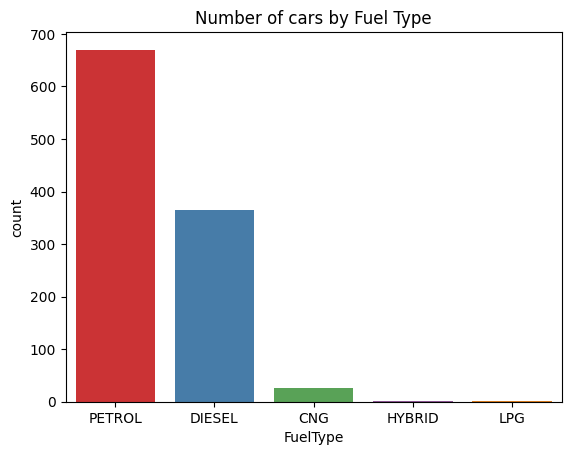

In [123]:
#Cars count by fuel type
sns.countplot(x = 'FuelType', data = df, palette = 'Set1').set_title('Number of cars by Fuel Type')

- Petrol and diesel cars have higher distribution comapred to other

Text(0.5, 1.0, 'Odometer Reading')

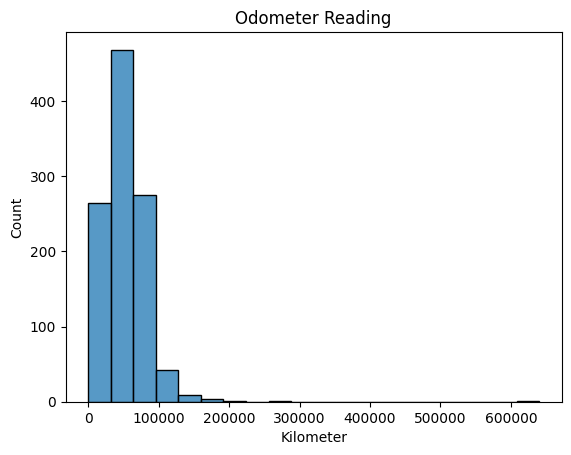

In [124]:
#Odometer reading distribution
sns.histplot(x = 'Kilometer', data = df, bins = 20).set_title('Odometer Reading')

This graph illustrates the distribution of odometer readings for the cars in the dataset. It shows that most cars have been driven less than 100,000 km, with the majority falling within the 30,000 km to 50,000 km range. Therefore, we can infer that cars with lower odometer readings, particularly under 100,000 km, are in higher demand in the used car market and likely to have better resale value.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'HATCHBACK'),
  Text(1, 0, 'SEDAN'),
  Text(2, 0, 'MPV'),
  Text(3, 0, 'SUV'),
  Text(4, 0, 'HATCHBACK '),
  Text(5, 0, 'VAN'),
  Text(6, 0, 'MUV'),
  Text(7, 0, 'COMPACTSUV'),
  Text(8, 0, 'Sedan'),
  Text(9, 0, 'SUV ')])

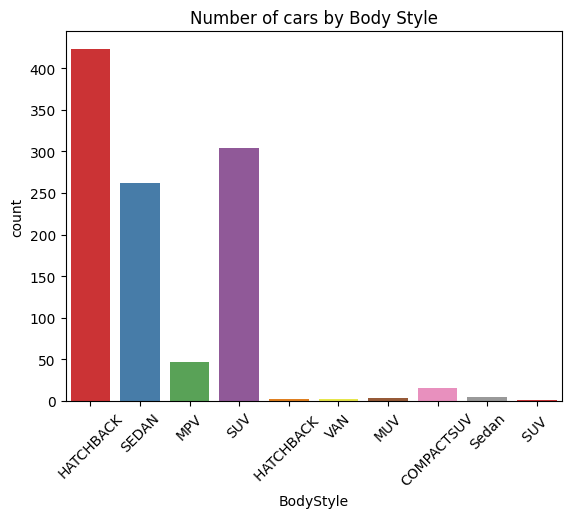

In [125]:
#Body style count
sns.countplot(x = 'BodyStyle', data = df, palette = 'Set1').set_title('Number of cars by Body Style')
plt.xticks(rotation = 45)

According to this graph, most of the cars have HatchBack, SUV and Sedan body style, which tells us about the market demand of these body styles. Therefore, we can assume that cars with HatchBack, SUV and Sedan body style are more in demand in the used car market will have a good resale value.

Text(0.5, 1.0, 'Car price distribution')

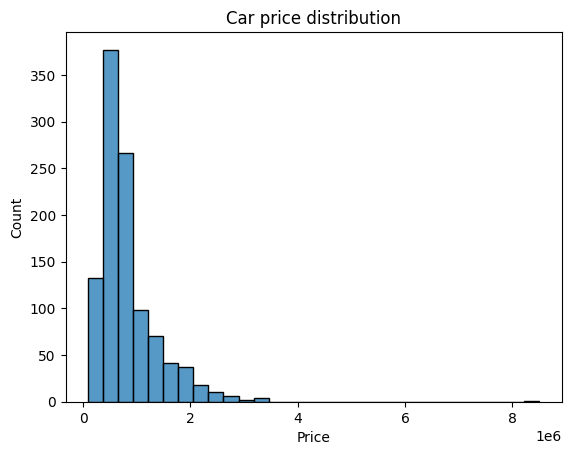

In [126]:
#Price distribution
sns.histplot(x = 'Price', data =df, bins = 30).set_title('Car price distribution')

This graph shows the distribution of car prices in the dataset. Most cars are priced between 3 to 9 lakhs, with the highest concentration between 3 to 6 lakhs. This suggests that cars within this price range are more popular in the used car market. Additionally, there are a few cars priced above 20 lakhs, which could either represent luxury vehicles or potential outliers.








Text(0.5, 1.0, 'Number of cars by Owner Type')

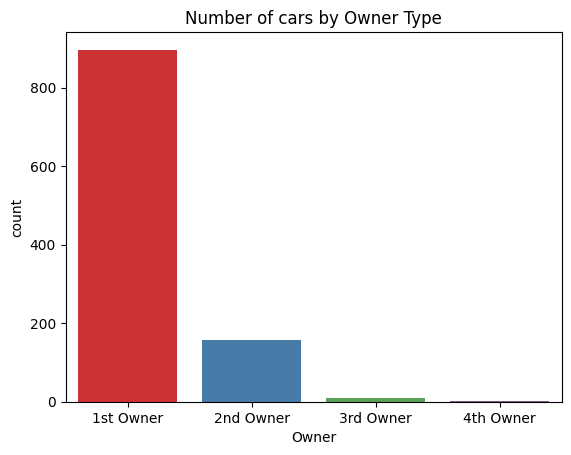

In [127]:
sns.countplot(x = 'Owner', data = df, palette = 'Set1').set_title('Number of cars by Owner Type')

 Majority of the distribution is by single owners.

Text(0.5, 1.0, 'Top 5 car Models by price')

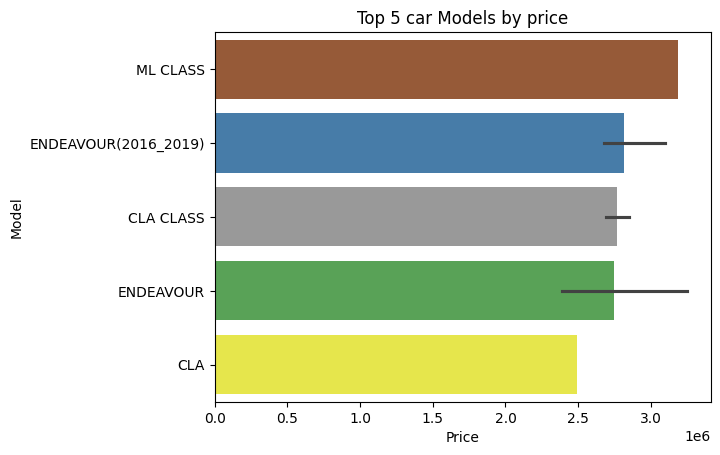

In [128]:
#Top 10 car models by price
sns.barplot(y = 'Model', x = 'Price', data = df, order = df.groupby('Model')['Price'].mean().sort_values(ascending=False).iloc[:5].index, 
            hue = 'Model', palette= 'Set1').set_title('Top 5 car Models by price')

ML Class, Endeavour(2016_2019), CLA class are the top three models with highest resale value

## Data Processing for predictive models

In [129]:
df.drop('Model', axis = 1, inplace = True)

### Label Encoder

In [130]:
#columns for label encoding
cols = df.select_dtypes(include=['object']).columns

from sklearn.preprocessing import LabelEncoder
#Label encoding object
le = LabelEncoder()

#label encoding for object type columns
for i in cols:
    le.fit(df[i])
    df[i] = le.transform(df[i])
    print(i, df[i].unique())

Company [12  7 19  5 13 21 11  6 17 16  9  4 20 10  1  3 18 14  0  8 22 15  2]
FuelType [4 1 0 2 5 3]
Colour [61 56 34  0  9 11 66 47 49 38 14 71 72 30 74 52 39 28 60  7 54 62 40 13
 20 70 63 12 24 23 35 26 29 15 31  1 68  4  8 73 22 44 57 65 42 50 32 64
 19 43 46 33 16 27 53 25 10 69 51 17  6 48 59 58  5  3 18 45 67 36 21 55
  2 37 75 41]
BodyStyle [1 5 3 6 2 9 4 0 8 7]
Owner [0 1 2 3]
DealerState [2 4 0 1 8 7 3 6 9 5]
DealerName [52 38  4  1 56 29  0 34 47 51 11 21  9 10 43 33  7 16  5 12 42 17 27 50
 45  6 20 36 23 41 32 31 18  2 48 15 54 40 55 13 49 25 35 46 24 14 44 19
 39 28 26  3 53 30  8 22 37]
City [ 0 10  2  3  9  4  5  8  1  7  6]


### Remove Outliers

In [131]:
#Using IQRS to remove outliers

#columns for outlier removal
cols = df.select_dtypes(include=['int64','float64']).columns
Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)

IQR = Q3 - Q1

#Removing outliers
df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

### Train test Split

In [132]:
X = df.drop('Price', axis=1)
y = df['Price']

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Model evaluation
print('Train RMSE:', mean_squared_error(y_train, y_pred_train, squared=False))
print('Test RMSE:', mean_squared_error(y_test, y_pred_test, squared=False))
print('R² Score:', r2_score(y_test, y_pred_test))

Train RMSE: 228912.33202227353
Test RMSE: 214241.00020621895
R² Score: 0.5739340729922839


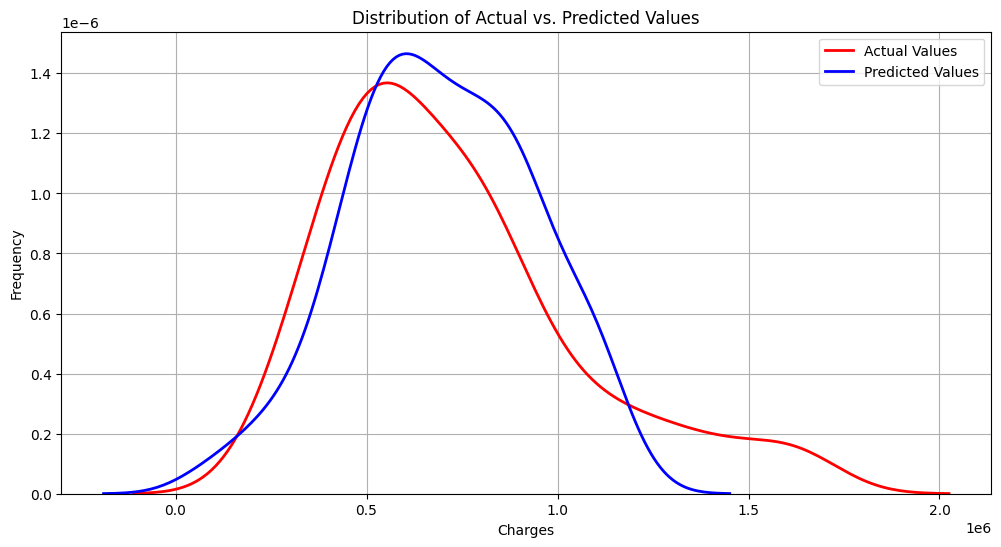

In [135]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Random Forest Regressor

In [136]:
from sklearn.ensemble import RandomForestRegressor

In [137]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print(f'Training MSE: {mean_squared_error(y_train, y_pred_train)}')
print(f'Training R^2: {r2_score(y_train, y_pred_train)}')
print(f'Test MSE: {mean_squared_error(y_test, y_pred_test)}')
print(f'Test R^2: {r2_score(y_test, y_pred_test)}')

Training MSE: 4864922669.565217
Training R^2: 0.9565598583465839
Test MSE: 29043116848.044693
Test R^2: 0.7304031259844375


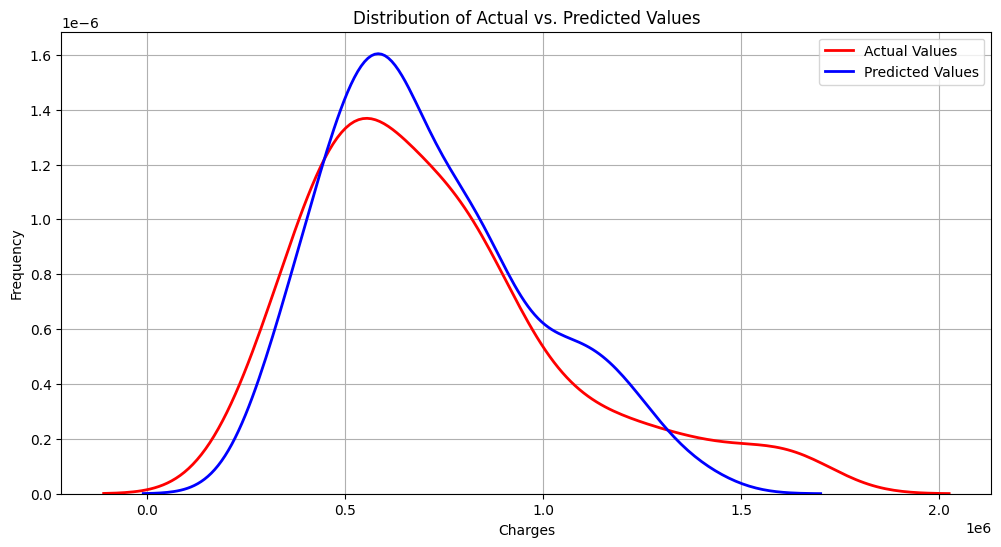

In [138]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

### Hyper parameter tuning

In [143]:
from sklearn.model_selection import GridSearchCV

#parameters for grid search
para = {
    'max_depth' : [2,4,6,8],
    'min_samples_leaf' : [2,4,6,8],
    'min_samples_split' : [2,4,6,8],
    'random_state' : [0,42]
}

#Grid Search Object
grid = GridSearchCV(estimator=rf_model, param_grid=para, cv=5, n_jobs=-1, verbose=2)

#Fitting the model
grid.fit(X_train, y_train)

#Best parameters
print(grid.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits
{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}


In [145]:
#Random Forest Regressor with best parameters
rf_model = RandomForestRegressor(max_depth=8, min_samples_leaf=2, min_samples_split=2, random_state=0)

#Fitting the model
rf_model.fit(X_train, y_train)

#Training score
print(rf_model.score(X_train, y_train))

0.8781873430425237


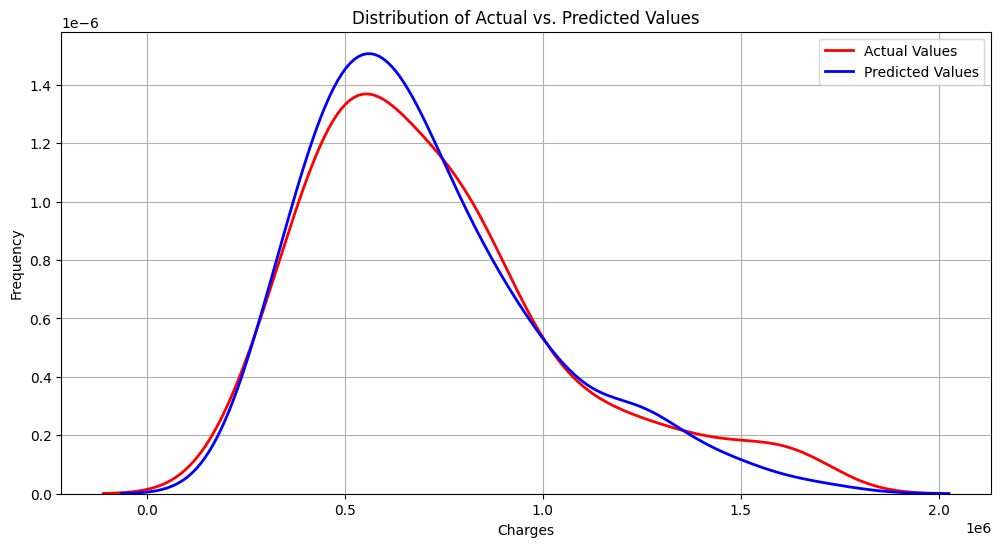

In [146]:
plt.figure(figsize=(12, 6))

# Plotting the KDE of actual values
sns.kdeplot(y_test, color='r', label='Actual Values', linewidth=2)

# Plotting the KDE of predicted values
sns.kdeplot(y_pred_test, color='b', label='Predicted Values', linewidth=2)

# Adding labels and title
plt.title('Distribution of Actual vs. Predicted Values')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

# Accuracy of Models

#### Linear Regression Accuracy - 0.57
#### Random Forest Regressor - 0.73
#### Random Forest Regressor with hypertuning - 0.87

## Conclusion


From the exploratory data analysis, two key insights emerged about the used car market: demand and price. There is higher demand for low-priced used cars compared to expensive ones, showing that customers are more attracted to budget-friendly options.

In terms of car companies, brands like MG, Mercedes Benz, BMW, Volvo, and KIA have the highest prices, but Maruti Suzuki, Hyundai, Honda, Mahindra, and Tata cars are in greater demand. This indicates that while luxury cars tend to be more expensive, customers prefer to buy new luxury cars rather than used ones.

Most cars run on petrol or diesel, with diesel cars generally priced slightly higher. Additionally, cars in common colors like white, grey, silver, and black are more in demand, but exotic colors such as burgundy, dark blue, and black magic tend to have higher prices.

Regarding odometer readings, the majority of cars have been driven less than 10,000 km, and cars with lower mileage generally command higher prices. In terms of bodystyle, Hatchback, SUV, and Sedan are the most preferred, while MPV, SUV, and Sedan are the most expensive.

Car age also impacts resale value, with cars less than 5 years old being more in demand and priced higher. Additionally, location influences pricing, with Delhi, Maharashtra, and Rajasthan being the top states for higher prices. Car Estate, Star Auto India, and Car Choice are the top dealers with the highest prices.

Lastly, cars with 1st owner type are in higher demand and priced higher. Cars with a warranty provide added assurance to buyers, which increases their price slightly, while cars with a higher quality score tend to have higher prices as well.

- Now for the models, eventhough linear refression have a very low accuracy, the random forest with hypertuning showed much more accurate responses from the data